In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import torch.nn.functional as F

In [3]:
batch_size = 64
learning_rate = 0.01
momentum = 0.5
epoch = 10

In [4]:
# Step1：归一化，softmax归一化指数函数
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Step2：下载/获取数据集
train_dataset = datasets.MNIST(root='./drive/MyDrive/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./drive/MyDrive/', train=False, download=True, transform=transform)  # train=True训练集，=False测试集

# Step3：实例化一个dataset后，然后用Dataloader 包起来，即载入数据集。
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


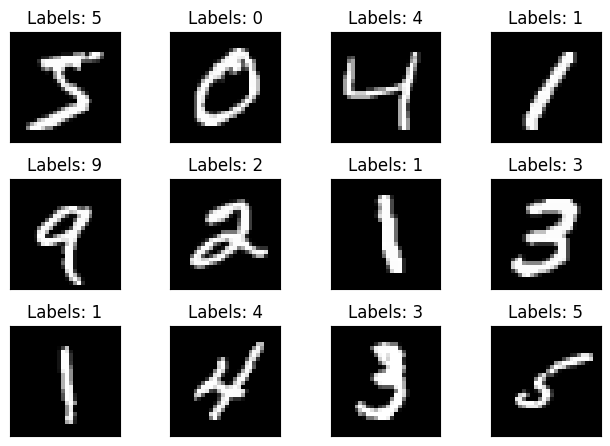

In [5]:
# 举例展示12幅图，包含图片内容和标签。
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.tight_layout()
    plt.imshow(train_dataset.data[i], cmap='gray', interpolation='none')
    plt.title("Labels: {}".format(train_dataset.targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [6]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 10, kernel_size=5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(10, 20, kernel_size=5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
        )
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(320, 50),
            torch.nn.Linear(50, 10),
        )

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv1(x)  # 一层卷积层,一层池化层,一层激活层(图是先卷积后激活再池化，差别不大)
        x = self.conv2(x)  # 再来一次
        x = x.view(batch_size, -1)  # flatten 变成全连接网络需要的输入 (batch, 20,4,4) ==> (batch,320), -1 此处自动算出的是320
        x = self.fc(x)
        return x  # 最后输出的是维度为10的，也就是（对应数学符号的0~9）


In [7]:
# 实例化模型
model = Net()

In [8]:
criterion = torch.nn.CrossEntropyLoss()  # 交叉熵损失
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)  # lr学习率，momentum冲量


In [9]:
def train(epoch):
    running_loss = 0.0  # 这整个epoch的loss清零
    running_total = 0
    running_correct = 0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        optimizer.zero_grad()

        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs, target)

        loss.backward()
        optimizer.step()

        # 把运行中的loss累加起来，为了下面300次一除
        running_loss += loss.item()
        # 把运行中的准确率acc算出来
        _, predicted = torch.max(outputs.data, dim=1)
        running_total += inputs.shape[0]
        running_correct += (predicted == target).sum().item()

        if batch_idx % 300 == 299:  # 不想要每一次都出loss，浪费时间，选择每300次出一个平均损失,和准确率
            print('[%d, %5d]: loss: %.3f , acc: %.2f %%'
                  % (epoch + 1, batch_idx + 1, running_loss / 300, 100 * running_correct / running_total))
            running_loss = 0.0  # 这小批300的loss清零
            running_total = 0
            running_correct = 0  # 这小批300的acc清零

In [10]:
def test():
    correct = 0
    total = 0
    with torch.no_grad():  # 测试集不用算梯度
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)  # dim = 1 列是第0个维度，行是第1个维度，沿着行(第1个维度)去找1.最大值和2.最大值的下标
            total += labels.size(0)  # 张量之间的比较运算
            correct += (predicted == labels).sum().item()
    acc = correct / total
    print('[%d / %d]: Accuracy on test set: %.1f %% ' % (epoch+1, epoch, 100 * acc))  # 求测试的准确率，正确数/总数
    return acc


In [15]:
batch_size = 64
learning_rate = 0.01
momentum = 0.5
epoch = 10

[1,   300]: loss: 0.758 , acc: 78.43 %
[1,   600]: loss: 0.220 , acc: 93.46 %
[1,   900]: loss: 0.158 , acc: 95.36 %
[11 / 10]: Accuracy on test set: 96.4 % 
[2,   300]: loss: 0.120 , acc: 96.45 %
[2,   600]: loss: 0.112 , acc: 96.59 %
[2,   900]: loss: 0.098 , acc: 96.96 %
[11 / 10]: Accuracy on test set: 97.5 % 
[3,   300]: loss: 0.086 , acc: 97.35 %
[3,   600]: loss: 0.087 , acc: 97.31 %
[3,   900]: loss: 0.080 , acc: 97.66 %
[11 / 10]: Accuracy on test set: 98.0 % 
[4,   300]: loss: 0.074 , acc: 97.63 %
[4,   600]: loss: 0.068 , acc: 97.92 %
[4,   900]: loss: 0.070 , acc: 97.81 %
[11 / 10]: Accuracy on test set: 97.8 % 
[5,   300]: loss: 0.061 , acc: 98.08 %
[5,   600]: loss: 0.062 , acc: 98.18 %
[5,   900]: loss: 0.064 , acc: 97.97 %
[11 / 10]: Accuracy on test set: 98.0 % 
[6,   300]: loss: 0.053 , acc: 98.40 %
[6,   600]: loss: 0.060 , acc: 98.11 %
[6,   900]: loss: 0.055 , acc: 98.27 %
[11 / 10]: Accuracy on test set: 98.3 % 
[7,   300]: loss: 0.046 , acc: 98.48 %
[7,   600]: l

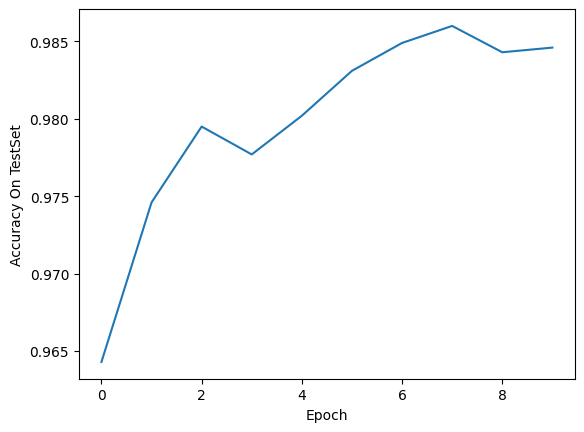

In [12]:
acc_list_test = []
for epo in range(epoch):
    train(epo)
    # if epoch % 10 == 9:  #每训练10轮 测试1次
    acc_test = test()
    acc_list_test.append(acc_test)

plt.plot(acc_list_test)
plt.xlabel('Epoch')
plt.ylabel('Accuracy On TestSet')
plt.show()

In [13]:
# 保存模型
torch.save(model.state_dict(), './model.pth')
torch.save(optimizer.state_dict(), './optimizer.pth')

In [ ]:
# 以下两个单元格重新加载模型
continued_network = Net()
continued_optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)  # lr学习率，momentum冲量


In [ ]:
network_state_dict = torch.load('model.pth')
continued_network.load_state_dict(network_state_dict)
optimizer_state_dict = torch.load('optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

[1,   300]: loss: 0.037 , acc: 98.85 %
[1,   600]: loss: 0.034 , acc: 98.92 %
[1,   900]: loss: 0.039 , acc: 98.83 %
[11 / 10]: Accuracy on test set: 98.8 % 
[2,   300]: loss: 0.035 , acc: 98.90 %
[2,   600]: loss: 0.035 , acc: 98.98 %
[2,   900]: loss: 0.032 , acc: 98.97 %
[11 / 10]: Accuracy on test set: 98.8 % 
[3,   300]: loss: 0.031 , acc: 98.99 %
[3,   600]: loss: 0.032 , acc: 98.98 %
[3,   900]: loss: 0.033 , acc: 98.97 %
[11 / 10]: Accuracy on test set: 98.8 % 


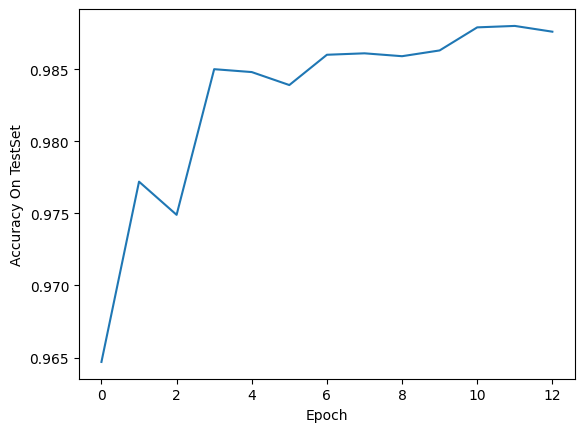

In [ ]:
for epo in range(3):
    train(epo)
    # if epoch % 10 == 9:  #每训练10轮 测试1次
    acc_test = test()
    acc_list_test.append(acc_test)

plt.plot(acc_list_test)
plt.xlabel('Epoch')
plt.ylabel('Accuracy On TestSet')
plt.show()